<a href="https://colab.research.google.com/github/rush0204/Counting-Objects-using-OpenCv/blob/main/Count_the_number_of_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Count the number of objects in image 
#### Computer Vision

---


Libraries used - OpenCV, Numpy, Matplotlib
1. Turn the images to **grayscale**.
2. **Blur image** slightly to remove noise.
3. Using **Canny Algorithm** to detect edges.
4. Connect the edges and make them thicker & visible using **dilate**
5. Calculating and drawing contours

In [ ]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files  
# img = files.upload()   # so that user can upload files

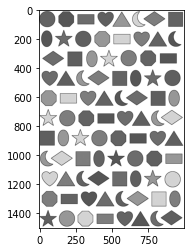

In [ ]:
img = cv2.imread('/content/shapes.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

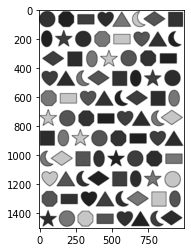

In [ ]:
# bluring to detect edges of objects TO REMOVE NOISE
# cv2.GaussianBlur(image-name, Kernal size, std. deviation) 

blur_img = cv2.GaussianBlur(gray_img, (11,11), 0)
plt.imshow(blur_img, cmap='gray')

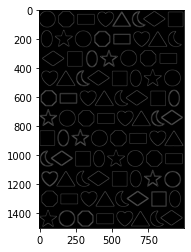

In [ ]:
# to detect edges using the canny algorithm
# cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)

canny = cv2.Canny(blur_img, 30, 150, 3)
plt.imshow(canny, cmap='gray')

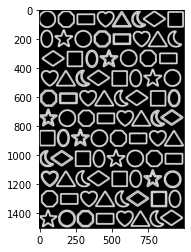

In [ ]:
thresh = cv2.adaptiveThreshold(canny,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                  cv2.THRESH_BINARY_INV,11,1)
plt.imshow(thresh, cmap='gray')

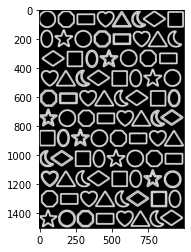

In [ ]:
# to connect the edges and to make them more thicker & visible
dilated = cv2.dilate(thresh, (3,3), iterations=0)
plt.imshow(dilated, cmap='gray')

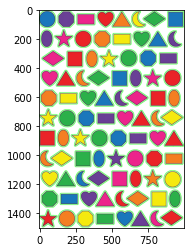

In [ ]:
# to count contours
(contours, hierarchy)= cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, contours, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)

In [ ]:
print("Number of boxes/pipes in the image: ", len(contours))

Number of boxes/pipes in the image:  87
